# Experiment Description

<p> We are going to optimize an instruction prefix using the GRIPS method. We are going to search for better instruction candidates using 4 different kinds of phrase edits {add, delete, swap, and paraphrase}. </p>

For example: <b>GRIPS for Instruction Prefix</b><br><br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>

  - <b>Initial Template:</b><br>
  'In this task, your job is to generate the sentiment of the next sentence in the output. I hate watching this movie.'<br>

  - <b>GRIPS</b> will only update the instruction tokens "In this task, your job is to generate the sentiment of the next sentence in the output."<br>

<p>Navigate to the directory containing src</p>

In [1]:
import os

os.chdir("../../../../")

In [2]:
# define the internal cuda variables for gpu node in the vector's cluster.
!source ./src/reference_implementations/setup_gpu_worker.sh

Hostname: gpu034
Node Rank 0
Using Python from: /ssd003/home/snajafi/codes/PromptEngineering/prompt_torch-env/bin/python


# Experiment on SemEval Sentiment

In [3]:
!rm -r -f "/tmp/grips_experiments/semeval"
!mkdir -p "/tmp/grips_experiments"
!mkdir -p "/tmp/grips_experiments/semeval"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to complete. 

__Note__ --num_candidates denotes the Number of candidates in each iteration of the algorithm.

__Note__ --num_compose denotes the Number of edits composed to get one candidate.
Recommended value form --num_compose is 1 from the GRIPS paper.

__Note__ --level denotes level at which edit operations occur: {phrase, word, sentence, span}

In [30]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file ./resources/datasets/2018-Valence-oc-En-train.txt \
    --dev_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 2 \
    --training_steps 100 \
    --num_candidates 10 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:42:15.706611: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.706881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.707094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:42:15.707324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'the', 'sentiment', 'of', 'the', 'next', 'sentence', 'in', 'the', 'output', '.']
edits: ['del' 'del' 'del' 'sub' 'swap' 'del' 'del' 'del' 'sub' 'sub']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', 'is', 'also', 'known', 'as', '', 'n']
New Candidate:  I It's also referred to as n
Epoch: 0 | Batch: 5 | Mean Loss: 59.35245522795687 | Epoch Loss: 59.35245522795687 | Loss: 61.868072179967996

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
edits: ['del' 'del' 'swap' 'del' 'swap' 'swap' 'sub' 'swap' 'sub' 'del']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', '', 't', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating bat

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']
edits: ['swap' 'swap' 'swap' 'del' 'add' 'del' 'del' 'sub' 'swap' 'add']
Epoch: 1 | Batch: 3 | Mean Loss: 58.37258756691506 | Epoch Loss: 62.69651296584465 | Loss: 66.48091895299528

evaluating batch with prompt template: ['I']
edits: ['swap' 'sub' 'swap' 'del' 'add' 'del' 'add' 'swap' 'sub' 'del']
Epoch: 1 | Batch: 4 | Mean Loss: 58.416858278545085 | Epoch Loss: 61.79261446263231 | Loss: 59.08091895299528

evaluating batch with prompt template: ['I']
evaluating batch with prompt template: ['I']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']
edits: ['add' 'add' 'swap' 'add' 'swap' 'add' 'sub' 'sub' 'sub' 'add']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know']
New Candidate:  I don't know
Epoch: 1 | Batch: 5 | Mean Loss: 58.47029649758646 | Epoch Loss: 61.29915317055553 | Loss: 59.325

Below we evaluate what the performance of our original prompt was on the evaluation set

In [24]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:03:15.506617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:03:15.507534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [31]:
# test with the best saved prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/grips_experiments/semeval \
    --prediction_file /tmp/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 05:59:19.573130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.573486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.573782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 05:59:19.574069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [33]:
# You can also run the tensorboard from the node to monitor training status as we are training with grips.
!tensorboard --logdir=/tmp/grips_experiments/semeval --bind_all

2023-03-23 06:01:40.287621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:40.287653: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 06:01:41.745287: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:41.782965: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 06:01:41.784304: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# GRIPS Result on SemEval
We see that the GRIPS search could find the following optimal prompt tokens.

['I', 'It', "'", 's', 'also', '', 'referred', '', 'referred', 'as', '', 'n']

The new template increase the performance to 60.13% accuracy from 59.0% with the original instruction.

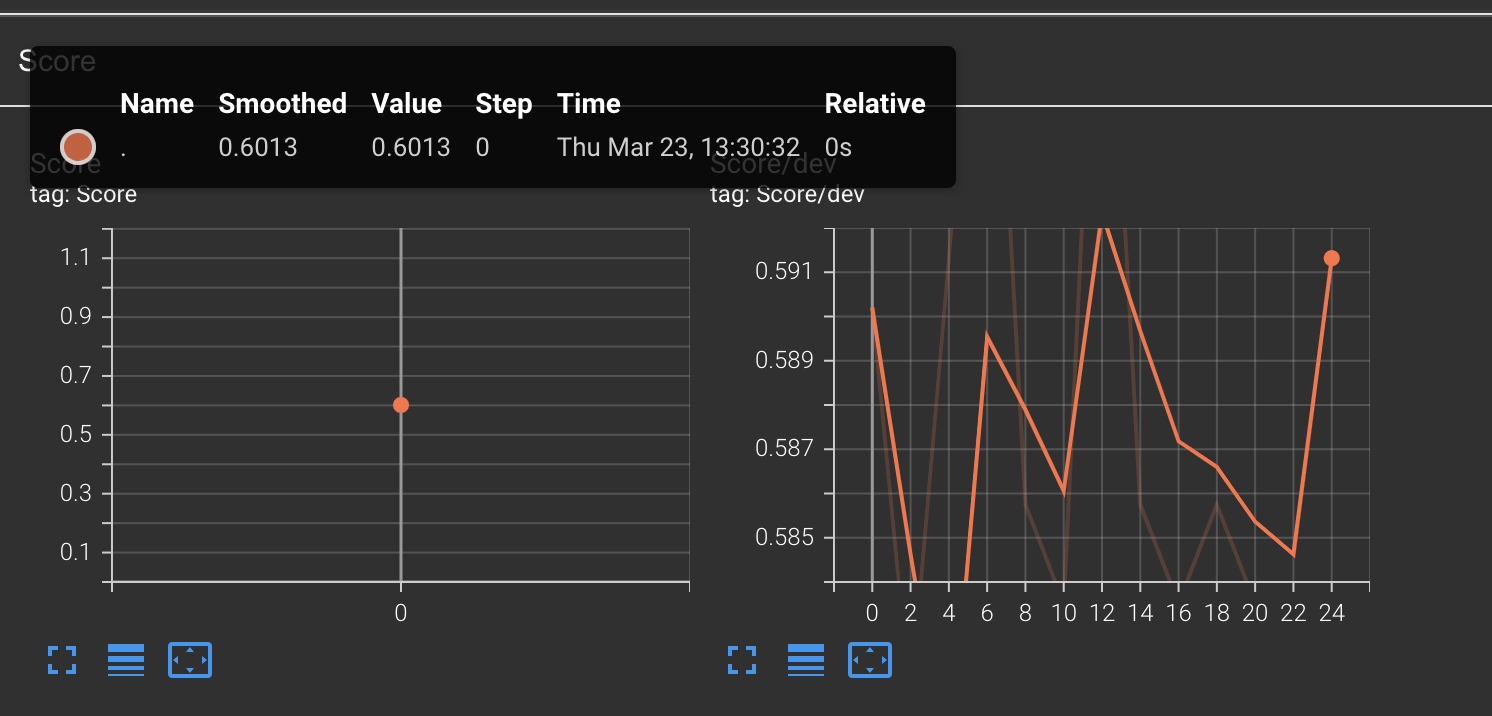

# Experiments on SST-2 Binary Sentiment Classification Task

Similar to SemEval, we can run the grips to further optimize the instruction at the start on the SST-2 dataset.

In [34]:
!rm -r -f "/tmp/grips_experiments/sst2"
!mkdir -p "/tmp/grips_experiments"
!mkdir -p "/tmp/grips_experiments/sst2"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 100 batches need to be completed

In [43]:
# Search only for 100 training steps!
# Change the argument --grips_initial_prompt for another initial prompt.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 50 \
    --num_candidates 5 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as 'positive' if the sentiment of the \
            sentence is great or as 'negative' if the sentiment of the sentence is terrible." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 08:00:40.342709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:00:40.343000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:00:40.343289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 08:00:40.343536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

edits: ['sub' 'swap' 'del' 'swap' 'add']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'As', ',', 'as', '', "'", 'positive', "'", '', 'if', 'the', 'sentiment', 'of', 'the', 'is', 'great', 'or', 'As', ',', 'as', '', "'", 'negative', "'", '', 'if', 'the', 'sentiment', 'of', 'the', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', 'reviews', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', 'sentiment', 'of', 'the', 'is', 'great', 'or', 'as', '', "'", 'negative', "'", '', 'if', 'the', 'sentiment', 'of', 'the', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class',

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', '', 's', 'the', 'is', 'great', 'or', 'as', '', "'", 'negative', "'", '', 'if', 'the', '', 's', 'the', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'sentiment', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', 'Of', 'the', 'is', 'great', 'or', 'as', '', "'", 'negative', "'", '', 'if', 'the', 'Of', 'the', 'is', 'terrible', '.']
New Candidate:  In this task, you are given s from movie reviews . The task is to classify a as 'positive' if the s the is great or as 'negative' if the s the is terrible.
Epoch: 0 | Batch: 4 | Mean Loss: 38.68900941526145 | Epoch Loss: 38.68900941526145 | Loss: 38.430

New Candidate:  In this task, you are given s from movie reviews . The task Is that the case to classify a as 'positive' if the s the Is that the case great or sentence as 'negative' if the s the Is that the case terrible.
Epoch: 0 | Batch: 6 | Mean Loss: 37.615829864917835 | Epoch Loss: 37.615829864917835 | Loss: 25.08285407772766

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'case', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'case', 'great', 'or', 'sentence', 'as', '', "'", 'negative', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'case', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'case', 'to', 'class', 'ify', '', 

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'great', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'great', 'or', 'sentence', 'as', '', "'", 'negative', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'terrible', '.']
New Candidate:  In this task, you great given s from movie reviews . The task Is that the to classify a as 'positive' if the s the Is that the great or sentence as 'negative' if the s the Is that the terrible.
Epoch: 0 | Batch: 8 | Mean Loss: 38.12758797342228 | Epoch Loss: 38.12758797342228 | Loss: 36.121356979451065

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'great', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', '

evaluating batch with prompt template: ['I', 'am', '', 'n']
edits: ['del' 'sub' 'del' 'sub' 'del']
evaluating batch with prompt template: ['I', 'am', 'am', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
New Candidate:  I don't know am n
Epoch: 0 | Batch: 14 | Mean Loss: 40.24169058271123 | Epoch Loss: 40.24169058271123 | Loss: 45.660766906861824

evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
evaluating batch with prompt template: ['I', 'don', "'", 't', 'know', 'am', '', 'n']
W0323 08:08:29.053057 139748421140608 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc

evaluating batch with prompt template: ['I', 'have', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'referred', 'to', 'as', '', 'n']
evaluating batch with prompt template: ['I', '', 'n', 'case']
New Candidate:  I have n
Epoch: 0 | Batch: 21 | Mean Loss: 39.89198133708343 | Epoch Loss: 39.89198133708343 | Loss: 38.856295218762064

evaluating batch with prompt template: ['I', 'have', '', 'n']
edits: ['del' 'del' 'swap' 'add' 'swap']
evaluating batch with prompt template: ['have', 'have', '', 'n']
evaluating batch with prompt template: ['I', 'have', '', 'n', 'case']
evaluating batch with prompt template: ['I', 'have', 'have']
New Candidate:  I have n case
Notice! Prev tracker:  ['case']
Notice! New tracker:  []
Epoch: 0 | Batch: 22 | Mean Loss: 40.383874625415764 | Epoch Loss: 40.383874625415764 | Loss: 50.71363368039487

evaluating batch with prompt template: ['I', 'have', '', 'n', 'case']
evaluating batch with prompt template: ['I', 'have', '', 'n', 'c

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
W0323 08:14:15.534290 139748421140608 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0323 08:14:15.538159 139748421140608 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'case', 'to', 'cla

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'known', 'as', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', 'called', '', 'n']
Epoch: 0 | Batch: 38 | Mean Loss: 41.33178329278919 | Epoch Loss: 41.33178329278919 | Loss: 34.392328294735194

evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
evaluating batch with prompt template: ['I', '', 'n']
W0323 08:16:53.209044 139748421140608 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0323 08:16:53.212861 139748421140608 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst

evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'n']
evaluating batch with prompt template: ['I', 'It', "'", 's', 'also', '', 'n']
W0323 08:19:33.118209 139748421140608 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0323 08:19:33.122108 139748421140608 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 

Below we evaluate what the performance of our original prompt was on the evaluation set

In [44]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as 'great' if the sentiment of the \
            sentence is positive or as 'terrible' if the sentiment of the sentence is negative." \

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 08:21:48.919991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:21:48.920261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:21:48.920486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 08:21:48.920755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [45]:
# test on sst2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path /tmp/grips_experiments/sst2 \
    --prediction_file /tmp/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as 'great' if the sentiment of the \
            sentence is positive or as 'terrible' if the sentiment of the sentence is negative." \

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 08:23:21.671084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:23:21.671332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-23 08:23:21.671565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-23 08:23:21.671777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [46]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=/tmp/grips_experiments/sst2 --bind_all

2023-03-23 08:26:37.174832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 08:26:37.174868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 08:26:39.912933: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 08:26:40.003778: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 08:26:40.008639: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# Results from SST2

As seen in the prediction, the instruction template ['In', 'this', 'task', ',', 'you', 'are', 'given', '', 's', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'the', 'case', 'to', 'class', 'ify', '', 'a', 'as', '', "'", 'positive', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'case', 'great', 'or', 'sentence', 'as', '', "'", 'negative', "'", '', 'if', 'the', '', 's', 'the', 'I', 's', 'that', 'the', 'case', 'terrible', '.'] achieves an impressive 78.89% accuracy on the sst2 dev set while the original template "In this task, you are given sentences from movie reviews. The task is to classify a sentence as 'great' if the sentiment of the sentence is positive or as 'terrible' if the sentiment of the sentence is negative." only achieved 59.63%. 

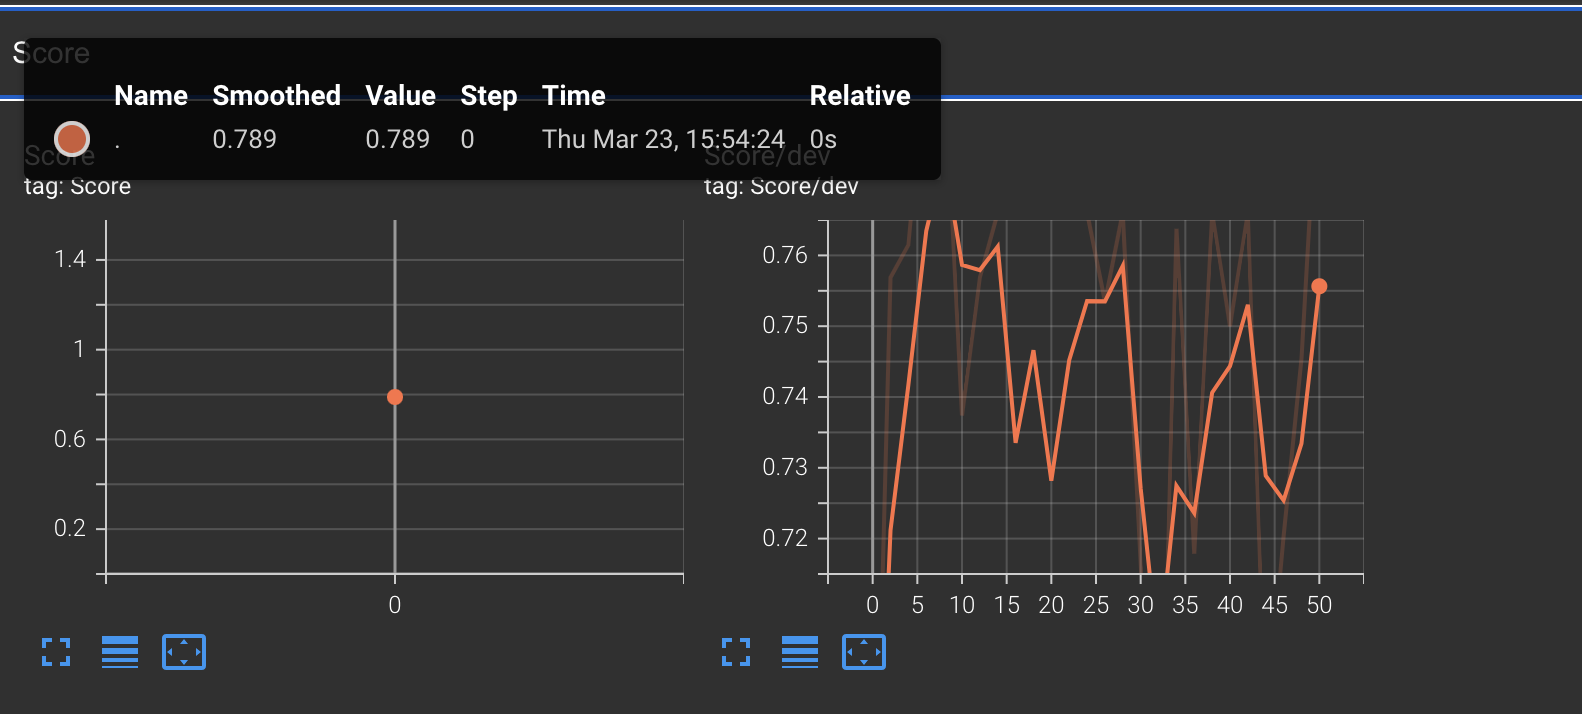